#introduction to machine learning
##pca analysis on MNIST dataset

داخل درس با آنالیز مولفه های اصلی آشنا شده اید ، در این تمرین قصد داریم از ابتدا این روش را روی دیتاست داده شده عملی کنیم و نتیایج این روش را با همدیگر مشاهده کنیم.

In [1]:
first_name= "Pouria"
last_name= "Dadkhah"
student_number= "401201381"

در بخش زیر تمامی کتابخانه هایی که لازم دارید را ایمپورت کنید.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### داده شده را لود کنید MNIST در این قسمت دیتا ست  

پیش از این که مولفه های اصلی داده ها را استخراج کنید آن را نرمالایز کنید.
توجه کنید که سمپل های لود شده به صورت 28*28  میباشند و باید آن را به صورت بردار 784 تایی تبدیل کنید

In [3]:
#load the data set
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#reshape data from 28*28 matrix to 784 array
x_train = np.reshape(x_train,(-1,784))
x_test = np.reshape(x_test,(-1,784))
#fill nan value with 0
x_train[np.isnan(x_train)] = 0

11490434/11490434 [==============================] - 0s 0us/step


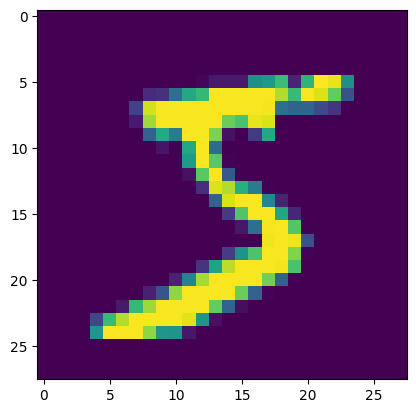

In [4]:
# here show 50 first of this images

def show_images(num_images,X):
    # TODO (implement show images function)
    #inputs dataset and number of images wants to show
    #output plot images
    for i in range(num_images):
        image=X[i]
        plt.imshow(image)
        plt.show()
    pass
show_images(1,np.reshape(x_train,(-1,28,28)))

In [5]:
#TODO scale the data set to [0 1]
#divide data to maximum value .
x_train = x_train/ 255

در این قسمت ابتدا تابع کواریانس داده را بدست آورید و سپس مقادیر ویژه و بردار ویژه های آن را استخراج کنید.

In [6]:
#TODO calculate the covariance matrix and the eigenvalue and eigenvectors of the covariance matrix.
x_meaned = x_train - np.mean(x_train , axis = 0)
cov_mat = np.cov(x_meaned , rowvar = False)
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

در بخش زیر میخواهیم تعدادی از مولفه های اصلی را استخراج کنیم که بخش قابل قبولی از واریانس داده ها را شامل شده باشند.

0.9999999999999994
26 0.7001981002072021
96.64034013605442


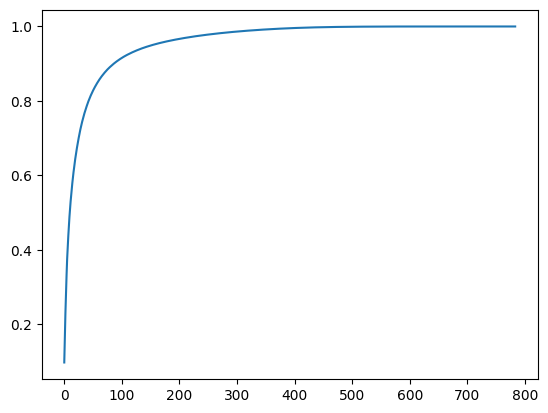

In [7]:
expected_variance = 0.7 # you can change this variable to get more component of datasets.
#calculate the total variance from eigenvalues and find the first k component that contains the eplained_variance of the total variance.
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalues = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_variance = np.cumsum(explained_variance)
print("total variance: ", cumulative_variance[783])

k = 2 # select the number of principal components
while sum(explained_variance[:k]) < expected_variance:
    k += 1

total_explained_variance = sum(explained_variance[:k])
print("pca component:", k,"total_explained_variance: ", total_explained_variance)


plt.plot(np.cumsum(explained_variance))

#calculate the compression_ratio
compression_ratio = 100*(x_meaned.size - (x_meaned.shape[0]*k + k*x_meaned.shape[1]))/x_meaned.size
print("compression_ratio: ", compression_ratio)

حال در این بخش دیتاهای موجود را روی این مولفه ها تصویر کنید عملیات کاهش بعدد را انجام دهید و سپس ابعاد را به اندازه تصاویر اصلی برگردانید و  تصویر یکی از سمپل ها را برای هر دو حالت قبل از کاهش بعد روی مولفه ها و بعد از آن رسم کنید.

(60000, 784)


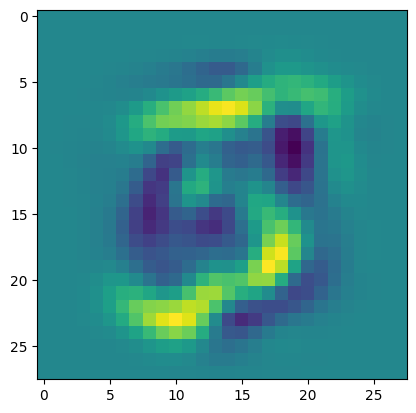

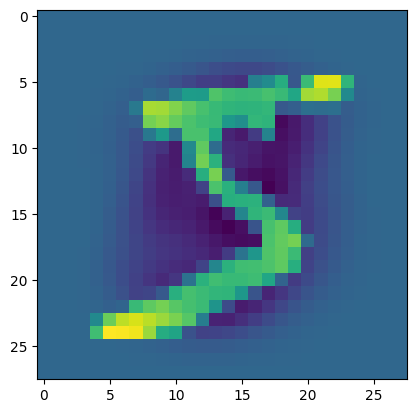

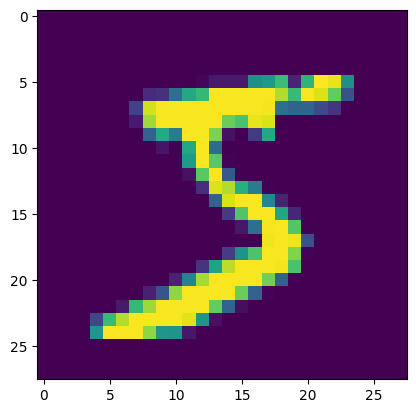

In [8]:
#Project Images into Reduced Dimensionality Eigenbasis F=X*V (X is our dataset,F our reduced dimensionality dataset,V is k choosen eigenvectors)
#And Reproject Images to Standard Basis for plotting the reduced component image X_k=F*V_transpose (V_transpose is equal to V inverse)
#select on sample and reshape it to a 28 by 28 matrix and plot them as image

#reduced_data = np.dot(x_meaned, sorted_eigenvectors[:,:k]) # transform the original data
eigenvector_subset = sorted_eigenvectors[:,0:k]
x_reduced = np.dot(x_meaned, eigenvector_subset)
x_reconstructed = np.dot(x_reduced, eigenvector_subset.transpose())
print(x_reconstructed.shape)
show_images(1,np.reshape(x_reconstructed, (-1,28,28)))
show_images(1,np.reshape(x_meaned,(-1,28,28)))
show_images(1,np.reshape(x_train,(-1,28,28)))

## Perform PCA and Gauge Max Accuracy

حال میخواهیم برای دیتای تصویر شده یک مدل یادگیری بسازیم و دقت مدل را برحسب تعدا مولفه های اصلی بدست بیاوریم .

In [9]:
#complete below function using python PCA function

def do_pca(n_components, data):
  x = StandardScaler().fit_transform(data)
  pca = PCA(n_components=n_components)
  principalComponents = pca.fit_transform(x)

  return principalComponents
  #input number of component and not normalized data set.
  #output is the projected dataset

x_proj = do_pca(26 ,x_train*255)
print(x_proj.shape)

(60000, 26)


In [10]:
#define a function that gets the X data and Y labels and returns the accuracy of ml model.

def ML_model(X, y, print_output=True):
    #define ML model inputs dataset and lables
    #output accuracy of model on dataset
    logreg = LogisticRegression(random_state=0)
    logreg.fit(X, y)
    # predict on projected training dataset?
    y_pred = logreg.predict(X)
    acc = metrics.accuracy_score(y_true= y, y_pred= y_pred)
    return acc

In [11]:
#your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)
#consider number of component from 2 to 101 and calculate accuracy based on number of components
acc_list, pc_list = [], []
for pc in range(2,30):
    x_projected = do_pca(pc, x_train*255)
    acc_list.append(ML_model(X= x_projected, y= y_train))
    pc_list.append(pc)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

<function matplotlib.pyplot.show(close=None, block=None)>

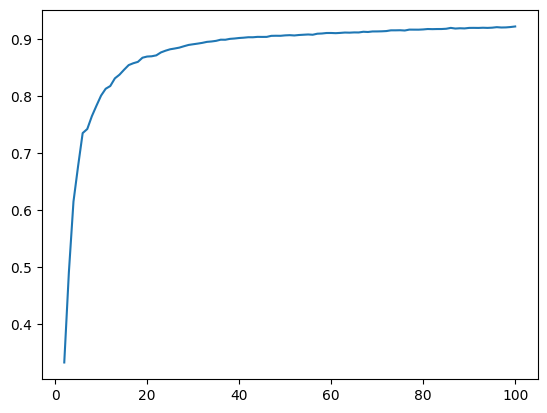

In [12]:
#plot the accuracy based on components.
# sorry for spliting the loop
# i ran first from 2 to 30 and the rest is here:
for pc in range(30,101):
    x_projected = do_pca(pc, x_train*255)
    acc_list.append(ML_model(X= x_projected, y= y_train))
    pc_list.append(pc)
plt.plot(pc_list, acc_list)
plt.show

In [13]:
#print the number of components that maximize the accuracy and the max accuracy
#TODO
max_accuracy = max(acc_list)
index = acc_list.index(max_accuracy)
best_pc = pc_list[index]
print("best_pc: ", best_pc, "max_accuracy: ", max_accuracy)

best_pc:  100 max_accuracy:  0.9216666666666666


In [ ]:
# a reference which has been used for this question is:
# https://www.askpython.com/python/examples/principal-component-analysis